In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web

In [260]:
tickers = ["UVXY", "^GSPC","^DJI", "^IXIC", "^TNX","^RUT", "CL=F", "GC=F","SI=F","EURUSD=X"]

In [261]:
data = pd.DataFrame()

In [262]:
for t in tickers:
    data[t] = web.DataReader(t, data_source="yahoo", start = "2000-1-1")["Open"]

In [263]:
data.isnull().sum()

UVXY          0
^GSPC         0
^DJI          0
^IXIC         0
^TNX         20
^RUT          1
CL=F         20
GC=F         21
SI=F         21
EURUSD=X    272
dtype: int64

In [264]:
data.corr()

,UVXY,^GSPC,^DJI,^IXIC,^TNX,^RUT,CL=F,GC=F,SI=F,EURUSD=X
UVXY,1.000000,-0.393019,-0.362503,-0.330579,-0.053185,-0.438987,0.284602,0.344688,0.499260,0.330060
^GSPC,-0.393019,1.000000,0.988940,0.984030,-0.102913,0.942405,-0.637665,-0.047863,-0.623600,-0.620591
^DJI,-0.362503,0.988940,1.000000,0.965144,-0.024263,0.951428,-0.576854,-0.047149,-0.599332,-0.582923
^IXIC,-0.330579,0.984030,0.965144,1.000000,-0.211618,0.885613,-0.630608,0.089787,-0.526578,-0.587625
^TNX,-0.053185,-0.102913,-0.024263,-0.211618,1.000000,0.193711,0.372599,-0.663210,-0.280125,0.233319
^RUT,-0.438987,0.942405,0.951428,0.885613,0.193711,1.000000,-0.533067,-0.283449,-0.704688,-0.570859
CL=F,0.284602,-0.637665,-0.576854,-0.630608,0.372599,-0.533067,1.000000,0.210835,0.636876,0.897927
GC=F,0.344688,-0.047863,-0.047149,0.089787,-0.663210,-0.283449,0.210835,1.000000,0.746967,0.317624
SI=F,0.499260,-0.623600,-0.599332,-0.526578,-0.280125,-0.704688,0.636876,0.746967,1.000000,0.652461
EURUSD=X,0.330060,-0.620591,-0.582923,-0.587625,0.233319,-0.570859,0.897927,0.317624,0.652461,1.000000


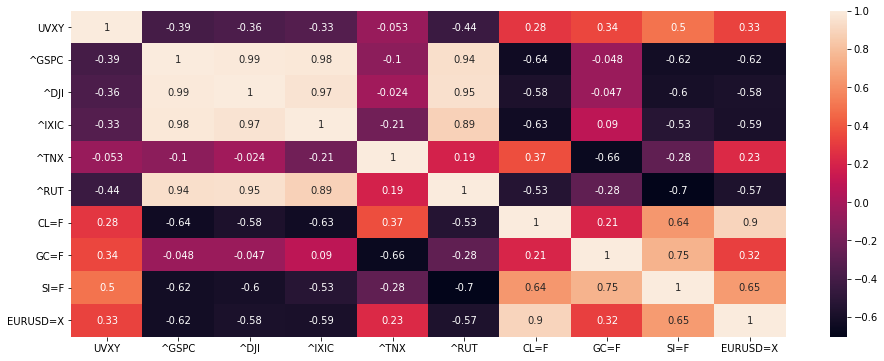

In [265]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(), annot=True)

In [266]:
vix = web.DataReader("^VIX", data_source="yahoo", start = "2000-1-1")["Close"]

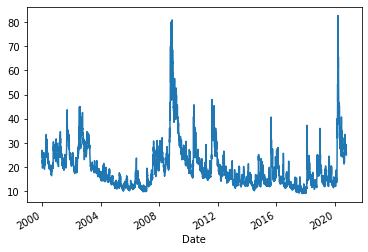

In [267]:
vix.plot()

In [268]:
data = pd.concat([data, vix], axis=1)

In [269]:
data

,UVXY,^GSPC,^DJI,^IXIC,^TNX,^RUT,CL=F,GC=F,SI=F,EURUSD=X,Close
Date,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.209999
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.010000
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.410000
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.730000
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.719999
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-07,19.850000,3384.560059,27971.359375,11271.679688,0.780,1581.119995,39.830002,1874.099976,23.495001,1.176554,28.059999
2020-10-08,19.129999,3434.280029,28348.859375,11443.349609,0.780,1615.270020,39.990002,1893.000000,24.070000,1.176706,26.360001
2020-10-09,17.440001,3459.669922,28533.609375,11487.599609,0.774,1630.709961,41.310001,1909.300049,24.320000,NaN,25.000000


## Dropping NaN Vlaues 
- Need to rmove these for modelto read data corrrectly

In [270]:
data.dropna(inplace=True)

### Training Testing Splitting

In [271]:
X = data.drop("Close", axis=1).values
y = data["Close"].values

In [272]:
from sklearn.model_selection import train_test_split

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [274]:
X_train.shape

(1385, 10)

### Scaling 

In [275]:
from sklearn.preprocessing import MinMaxScaler

In [276]:
scalar = MinMaxScaler()

In [277]:
X_train = scalar.fit_transform(X_train)

In [278]:
X_test = scalar.transform(X_test)

### Early Stopping

In [279]:
from tensorflow.keras.callbacks import EarlyStopping

In [280]:
stop = EarlyStopping("val_loss", mode="min", patience=100)

### Model Creation

In [281]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [282]:
model = Sequential()
model.add(Dense(units= 30, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units= 20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units= 20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units= 10, activation = "relu"))
model.add(Dense(units= 1))
model.compile(loss = "mse", optimizer = "adam")

In [283]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=700, callbacks=[stop])

Train on 1385 samples, validate on 594 samples
Epoch 1/700
1385/1385 [==============================] - 2s 1ms/sample - loss: 328.9125 - val_loss: 324.9102
Epoch 2/700
1385/1385 [==============================] - 0s 169us/sample - loss: 252.6879 - val_loss: 166.1195
Epoch 3/700
1385/1385 [==============================] - 0s 183us/sample - loss: 133.7383 - val_loss: 93.8561
Epoch 4/700
1385/1385 [==============================] - 0s 175us/sample - loss: 117.3763 - val_loss: 89.8957
Epoch 5/700
1385/1385 [==============================] - 0s 181us/sample - loss: 108.6339 - val_loss: 83.9135
Epoch 6/700
1385/1385 [==============================] - 0s 172us/sample - loss: 101.7203 - val_loss: 76.9015
Epoch 7/700
1385/1385 [==============================] - 0s 181us/sample - loss: 96.8820 - val_loss: 81.2236
Epoch 8/700
1385/1385 [==============================] - 0s 175us/sample - loss: 94.6168 - val_loss: 80.7881
Epoch 9/700
1385/1385 [==============================] - 0s 180us/sample - 

1385/1385 [==============================] - 0s 195us/sample - loss: 25.5943 - val_loss: 25.0977
Epoch 76/700
1385/1385 [==============================] - 0s 188us/sample - loss: 28.3894 - val_loss: 25.7447
Epoch 77/700
1385/1385 [==============================] - 0s 189us/sample - loss: 26.5090 - val_loss: 27.3112
Epoch 78/700
1385/1385 [==============================] - 0s 172us/sample - loss: 25.9112 - val_loss: 25.0949
Epoch 79/700
1385/1385 [==============================] - 0s 179us/sample - loss: 25.7979 - val_loss: 24.5294
Epoch 80/700
1385/1385 [==============================] - 0s 171us/sample - loss: 21.5486 - val_loss: 25.4221
Epoch 81/700
1385/1385 [==============================] - 0s 172us/sample - loss: 25.5992 - val_loss: 24.9445
Epoch 82/700
1385/1385 [==============================] - 0s 174us/sample - loss: 25.6396 - val_loss: 25.3244
Epoch 83/700
1385/1385 [==============================] - 0s 170us/sample - loss: 26.1218 - val_loss: 24.0637
Epoch 84/700
1385/1385 

1385/1385 [==============================] - 0s 175us/sample - loss: 20.0669 - val_loss: 25.5066
Epoch 150/700
1385/1385 [==============================] - 0s 173us/sample - loss: 18.5995 - val_loss: 23.9570
Epoch 151/700
1385/1385 [==============================] - 0s 168us/sample - loss: 16.9772 - val_loss: 24.5581
Epoch 152/700
1385/1385 [==============================] - 0s 169us/sample - loss: 17.6527 - val_loss: 23.6395
Epoch 153/700
1385/1385 [==============================] - 0s 168us/sample - loss: 19.8961 - val_loss: 25.1878
Epoch 154/700
1385/1385 [==============================] - 0s 168us/sample - loss: 17.0757 - val_loss: 25.7676
Epoch 155/700
1385/1385 [==============================] - 0s 170us/sample - loss: 16.3596 - val_loss: 24.3357
Epoch 156/700
1385/1385 [==============================] - 0s 168us/sample - loss: 21.2659 - val_loss: 25.5718
Epoch 157/700
1385/1385 [==============================] - 0s 167us/sample - loss: 19.4797 - val_loss: 26.0139
Epoch 158/700
1

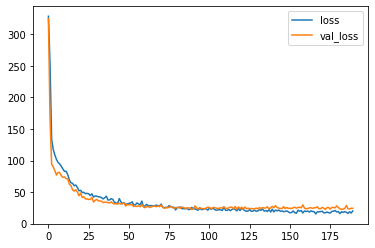

In [284]:
pd.DataFrame(model.history.history).plot()

In [285]:
predictions = model.predict(X_test)

In [286]:
predictions

array([[17.695078 ],
       [14.401241 ],
       [14.69418  ],
       [20.501575 ],
       [15.470168 ],
       [13.98752  ],
       [14.04945  ],
       [15.901595 ],
       [14.036461 ],
       [14.01947  ],
       [21.142105 ],
       [14.799649 ],
       [14.31984  ],
       [16.61564  ],
       [16.343378 ],
       [15.30229  ],
       [17.721054 ],
       [14.01947  ],
       [14.042997 ],
       [14.0569   ],
       [14.242895 ],
       [15.48237  ],
       [14.232417 ],
       [20.604456 ],
       [14.070261 ],
       [19.11903  ],
       [14.01947  ],
       [15.011959 ],
       [18.154053 ],
       [14.638633 ],
       [14.048969 ],
       [14.456273 ],
       [17.071674 ],
       [14.01947  ],
       [14.01947  ],
       [27.713776 ],
       [21.62696  ],
       [14.25486  ],
       [15.086256 ],
       [14.01947  ],
       [14.070017 ],
       [23.46895  ],
       [32.769203 ],
       [14.01947  ],
       [14.01947  ],
       [16.399527 ],
       [14.081865 ],
       [14.13

In [287]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score

In [288]:
print(explained_variance_score(y_test,predictions))

0.6329288758460687


In [289]:
print(mean_absolute_error(y_test,predictions))

2.7236252103991783


In [290]:
print(mean_squared_error(y_test,predictions))

24.21215848306218


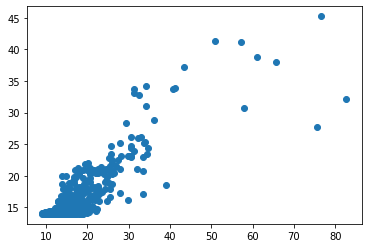

In [291]:
plt.scatter(y_test, predictions)

In [292]:
## Trying on andom data

In [293]:
from random import randint
randomIndex = randint(1,len(data))
randomDay = data.drop("Close", axis=1).iloc[randomIndex]

In [294]:
newDay = scalar.transform(randomDay.values.reshape(1,10))

In [295]:
model.predict(newDay)

array([[13.991767]], dtype=float32)

In [296]:
data.iloc[randomIndex]["Close"]

15.600000381469727

### lets try to improve the predictions with feature engineering
- We will add the daily returns for each tickers in the data set

In [297]:
for t in tickers: 
    data[f"{t} daily return"] = data[t].pct_change()

In [298]:
data

,UVXY,^GSPC,^DJI,^IXIC,^TNX,^RUT,CL=F,GC=F,SI=F,EURUSD=X,...,UVXY daily return,^GSPC daily return,^DJI daily return,^IXIC daily return,^TNX daily return,^RUT daily return,CL=F daily return,GC=F daily return,SI=F daily return,EURUSD=X daily return
Date,,,,,,,,,,,,,,,,,,,,,
2011-10-04,2.427000e+08,1097.420044,10651.440430,2312.679932,1.735,605.419983,76.400002,1661.000000,31.184999,1.332747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-05,1.974600e+08,1124.030029,10800.469727,2398.370117,1.864,648.469971,78.250000,1629.300049,28.605000,1.334045,...,-0.186403,0.024248,0.013991,0.037052,0.074352,0.071108,0.024215,-0.019085,-0.082732,0.000974
2011-10-06,1.811400e+08,1144.109985,10939.870117,2459.050049,1.920,656.869995,79.709999,1642.599976,30.340000,1.342696,...,-0.082650,0.017864,0.012907,0.025300,0.030043,0.012954,0.018658,0.008163,0.060654,0.006485
2011-10-10,1.654800e+08,1158.150024,11104.559570,2522.719971,2.076,664.580017,82.750000,1645.599976,32.250000,1.363308,...,-0.086452,0.012272,0.015054,0.025892,0.081250,0.011738,0.038138,0.001826,0.062953,0.015351
2011-10-11,1.570200e+08,1194.599976,11432.799805,2554.699951,2.148,679.729980,85.699997,1685.000000,32.255001,1.364405,...,-0.051124,0.031473,0.029559,0.012677,0.034682,0.022796,0.035650,0.023943,0.000155,0.000805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-05,2.072000e+01,3367.270020,27825.419922,11169.110352,0.711,1541.199951,37.000000,1898.900024,23.834999,1.178828,...,0.054990,-0.005493,-0.004123,-0.010882,0.014265,0.021609,-0.072682,0.007855,0.018807,0.003760
2020-10-06,1.977000e+01,3408.739990,28214.240234,11314.530273,0.785,1584.489990,39.349998,1906.599976,24.469999,1.173737,...,-0.045849,0.012316,0.013974,0.013020,0.104079,0.028089,0.063513,0.004055,0.026642,-0.004319
2020-10-07,1.985000e+01,3384.560059,27971.359375,11271.679688,0.780,1581.119995,39.830002,1874.099976,23.495001,1.176554,...,0.004047,-0.007094,-0.008608,-0.003787,-0.006369,-0.002127,0.012198,-0.017046,-0.039845,0.002400


In [299]:
data.columns

Index(['UVXY', '^GSPC', '^DJI', '^IXIC', '^TNX', '^RUT', 'CL=F', 'GC=F',
       'SI=F', 'EURUSD=X', 'Close', 'UVXY daily return', '^GSPC daily return',
       '^DJI daily return', '^IXIC daily return', '^TNX daily return',
       '^RUT daily return', 'CL=F daily return', 'GC=F daily return',
       'SI=F daily return', 'EURUSD=X daily return'],
      dtype='object')

In [300]:
data.isnull().sum()

UVXY                     0
^GSPC                    0
^DJI                     0
^IXIC                    0
^TNX                     0
^RUT                     0
CL=F                     0
GC=F                     0
SI=F                     0
EURUSD=X                 0
Close                    0
UVXY daily return        1
^GSPC daily return       1
^DJI daily return        1
^IXIC daily return       1
^TNX daily return        1
^RUT daily return        1
CL=F daily return        1
GC=F daily return        1
SI=F daily return        1
EURUSD=X daily return    1
dtype: int64

In [307]:
data.dropna(inplace=True)

In [308]:
X = data.drop("Close", axis=1).values
y = data["Close"].values

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [310]:
X_train = scalar.fit_transform(X_train)

In [311]:
X_test = scalar.transform(X_test)

In [312]:
model = Sequential()
model.add(Dense(units= 40, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units= 30, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units= 20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units= 10, activation = "relu"))
model.add(Dense(units= 1))
model.compile(loss = "mse", optimizer = "adam")

In [313]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs= 700, callbacks=[stop])

Train on 1384 samples, validate on 594 samples
Epoch 1/700
1384/1384 [==============================] - 2s 1ms/sample - loss: 317.0844 - val_loss: 244.0336
Epoch 2/700
1384/1384 [==============================] - 0s 176us/sample - loss: 178.0746 - val_loss: 73.6548
Epoch 3/700
1384/1384 [==============================] - 0s 177us/sample - loss: 135.1390 - val_loss: 73.9226
Epoch 4/700
1384/1384 [==============================] - 0s 175us/sample - loss: 120.4804 - val_loss: 66.4160
Epoch 5/700
1384/1384 [==============================] - 0s 176us/sample - loss: 115.3413 - val_loss: 59.2692
Epoch 6/700
1384/1384 [==============================] - 0s 176us/sample - loss: 99.1821 - val_loss: 50.8181
Epoch 7/700
1384/1384 [==============================] - 0s 177us/sample - loss: 97.7286 - val_loss: 57.0692
Epoch 8/700
1384/1384 [==============================] - 0s 177us/sample - loss: 87.2722 - val_loss: 61.2013
Epoch 9/700
1384/1384 [==============================] - 0s 175us/sample - lo

1384/1384 [==============================] - 0s 174us/sample - loss: 25.9997 - val_loss: 12.7203
Epoch 76/700
1384/1384 [==============================] - 0s 174us/sample - loss: 23.5914 - val_loss: 12.7855
Epoch 77/700
1384/1384 [==============================] - 0s 173us/sample - loss: 24.1877 - val_loss: 16.6376
Epoch 78/700
1384/1384 [==============================] - 0s 174us/sample - loss: 27.3574 - val_loss: 15.5898
Epoch 79/700
1384/1384 [==============================] - 0s 177us/sample - loss: 27.9117 - val_loss: 14.4076
Epoch 80/700
1384/1384 [==============================] - 0s 176us/sample - loss: 23.0212 - val_loss: 16.2216
Epoch 81/700
1384/1384 [==============================] - 0s 180us/sample - loss: 27.5450 - val_loss: 14.8473
Epoch 82/700
1384/1384 [==============================] - 0s 182us/sample - loss: 23.0660 - val_loss: 14.6875
Epoch 83/700
1384/1384 [==============================] - 0s 180us/sample - loss: 23.1353 - val_loss: 14.3756
Epoch 84/700
1384/1384 

1384/1384 [==============================] - 0s 178us/sample - loss: 23.1552 - val_loss: 19.5348
Epoch 150/700
1384/1384 [==============================] - 0s 179us/sample - loss: 19.0737 - val_loss: 19.2639
Epoch 151/700
1384/1384 [==============================] - 0s 178us/sample - loss: 23.9670 - val_loss: 17.9950
Epoch 152/700
1384/1384 [==============================] - 0s 186us/sample - loss: 18.6046 - val_loss: 18.3415
Epoch 153/700
1384/1384 [==============================] - 0s 194us/sample - loss: 18.9345 - val_loss: 19.2825
Epoch 154/700
1384/1384 [==============================] - 0s 204us/sample - loss: 20.9837 - val_loss: 18.0674
Epoch 155/700
1384/1384 [==============================] - 0s 191us/sample - loss: 19.1101 - val_loss: 18.5579
Epoch 156/700
1384/1384 [==============================] - 0s 176us/sample - loss: 19.2158 - val_loss: 16.5996
Epoch 157/700
1384/1384 [==============================] - 0s 202us/sample - loss: 21.3014 - val_loss: 17.9303
Epoch 158/700
1

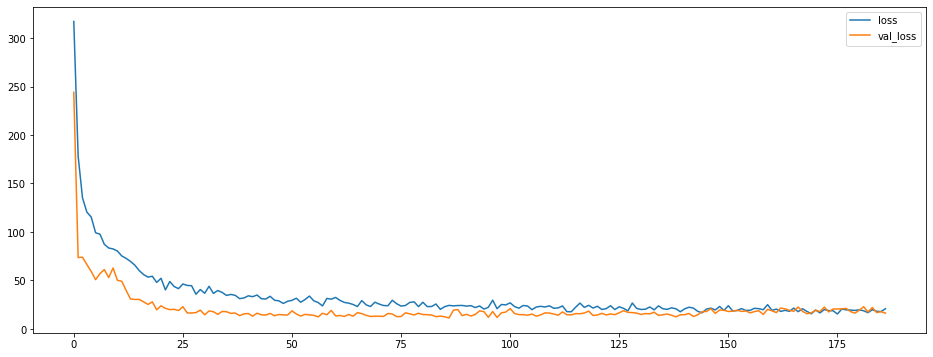

In [315]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

In [316]:
pred = model.predict(X_test)

In [317]:
print(explained_variance_score(y_test, pred))

0.6690938685713641


In [318]:
print(mean_squared_error(y_test, pred))

16.3026594702117


In [319]:
print(mean_absolute_error(y_test, pred))

2.69386155517013


## Random Predictions

In [347]:
rand_index = randint(1, len(data))
rand_day = data.drop("Close", axis=1).iloc[rand_index]

In [348]:
X_train.shape

(1384, 20)

In [349]:
rand_day = scalar.transform(rand_day.values.reshape(1,20))

In [350]:
model.predict(rand_day)

array([[19.895678]], dtype=float32)

## True Value

In [351]:
data.iloc[rand_index]["Close"]

27.56999969482422

### Classification 
- Using the daily return of VIX we will attempt to classify VIX as either Up or Down (0 ,1) using on hot encoding

In [352]:
data

,UVXY,^GSPC,^DJI,^IXIC,^TNX,^RUT,CL=F,GC=F,SI=F,EURUSD=X,...,UVXY daily return,^GSPC daily return,^DJI daily return,^IXIC daily return,^TNX daily return,^RUT daily return,CL=F daily return,GC=F daily return,SI=F daily return,EURUSD=X daily return
Date,,,,,,,,,,,,,,,,,,,,,
2011-10-05,1.974600e+08,1124.030029,10800.469727,2398.370117,1.864,648.469971,78.250000,1629.300049,28.605000,1.334045,...,-0.186403,0.024248,0.013991,0.037052,0.074352,0.071108,0.024215,-0.019085,-0.082732,0.000974
2011-10-06,1.811400e+08,1144.109985,10939.870117,2459.050049,1.920,656.869995,79.709999,1642.599976,30.340000,1.342696,...,-0.082650,0.017864,0.012907,0.025300,0.030043,0.012954,0.018658,0.008163,0.060654,0.006485
2011-10-10,1.654800e+08,1158.150024,11104.559570,2522.719971,2.076,664.580017,82.750000,1645.599976,32.250000,1.363308,...,-0.086452,0.012272,0.015054,0.025892,0.081250,0.011738,0.038138,0.001826,0.062953,0.015351
2011-10-11,1.570200e+08,1194.599976,11432.799805,2554.699951,2.148,679.729980,85.699997,1685.000000,32.255001,1.364405,...,-0.051124,0.031473,0.029559,0.012677,0.034682,0.022796,0.035650,0.023943,0.000155,0.000805
2011-10-12,1.394400e+08,1196.189941,11417.360352,2606.610107,2.226,693.710022,85.199997,1667.099976,32.754002,1.378873,...,-0.111960,0.001331,-0.001350,0.020319,0.036313,0.020567,-0.005834,-0.010623,0.015470,0.010604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-05,2.072000e+01,3367.270020,27825.419922,11169.110352,0.711,1541.199951,37.000000,1898.900024,23.834999,1.178828,...,0.054990,-0.005493,-0.004123,-0.010882,0.014265,0.021609,-0.072682,0.007855,0.018807,0.003760
2020-10-06,1.977000e+01,3408.739990,28214.240234,11314.530273,0.785,1584.489990,39.349998,1906.599976,24.469999,1.173737,...,-0.045849,0.012316,0.013974,0.013020,0.104079,0.028089,0.063513,0.004055,0.026642,-0.004319
2020-10-07,1.985000e+01,3384.560059,27971.359375,11271.679688,0.780,1581.119995,39.830002,1874.099976,23.495001,1.176554,...,0.004047,-0.007094,-0.008608,-0.003787,-0.006369,-0.002127,0.012198,-0.017046,-0.039845,0.002400


In [353]:
data.columns

Index(['UVXY', '^GSPC', '^DJI', '^IXIC', '^TNX', '^RUT', 'CL=F', 'GC=F',
       'SI=F', 'EURUSD=X', 'Close', 'UVXY daily return', '^GSPC daily return',
       '^DJI daily return', '^IXIC daily return', '^TNX daily return',
       '^RUT daily return', 'CL=F daily return', 'GC=F daily return',
       'SI=F daily return', 'EURUSD=X daily return'],
      dtype='object')

In [360]:
data["vix daily returns"] = data["Close"].pct_change()

In [361]:
data.dropna(inplace=True)

In [364]:
data.head(5)

,UVXY,^GSPC,^DJI,^IXIC,^TNX,^RUT,CL=F,GC=F,SI=F,EURUSD=X,...,^GSPC daily return,^DJI daily return,^IXIC daily return,^TNX daily return,^RUT daily return,CL=F daily return,GC=F daily return,SI=F daily return,EURUSD=X daily return,vix daily returns
Date,,,,,,,,,,,,,,,,,,,,,
2011-10-10,165480000.0,1158.150024,11104.559570,2522.719971,2.076,664.580017,82.750000,1645.599976,32.250000,1.363308,...,0.012272,0.015054,0.025892,0.081250,0.011738,0.038138,0.001826,0.062953,0.015351,-0.089606
2011-10-11,157020000.0,1194.599976,11432.799805,2554.699951,2.148,679.729980,85.699997,1685.000000,32.255001,1.364405,...,0.031473,0.029559,0.012677,0.034682,0.022796,0.035650,0.023943,0.000155,0.000805,-0.004846
2011-10-12,139440000.0,1196.189941,11417.360352,2606.610107,2.226,693.710022,85.199997,1667.099976,32.754002,1.378873,...,0.001331,-0.001350,0.020319,0.036313,0.020567,-0.005834,-0.010623,0.015470,0.010604,-0.048691
2011-10-13,133200000.0,1206.959961,11518.089844,2595.050049,2.198,696.469971,84.930000,1676.099976,31.790001,1.374306,...,0.009004,0.008822,-0.004435,-0.012579,0.003979,-0.003169,0.005399,-0.029432,-0.003312,-0.017914
2011-10-17,115740000.0,1224.469971,11643.349609,2653.320068,2.233,707.690002,87.480003,1683.599976,32.020000,1.374344,...,0.014508,0.010875,0.022454,0.015924,0.016110,0.030025,0.004475,0.007235,0.000027,0.087622


## Creating a funciton to do the conversion for us

In [371]:
def convert_to_hot(col): 
    if col < 0:
        return 0
    else:
        return 1

In [372]:
data["target"] = data["vix daily returns"].apply(lambda x: convert_to_hot(x))

## Completed
- We have added the one hot encoding to the target column
- our isssue that the daily return is a perfect predictor for the target s we will need to drop it

In [373]:
data

,UVXY,^GSPC,^DJI,^IXIC,^TNX,^RUT,CL=F,GC=F,SI=F,EURUSD=X,...,^DJI daily return,^IXIC daily return,^TNX daily return,^RUT daily return,CL=F daily return,GC=F daily return,SI=F daily return,EURUSD=X daily return,vix daily returns,target
Date,,,,,,,,,,,,,,,,,,,,,
2011-10-10,1.654800e+08,1158.150024,11104.559570,2522.719971,2.076,664.580017,82.750000,1645.599976,32.250000,1.363308,...,0.015054,0.025892,0.081250,0.011738,0.038138,0.001826,0.062953,0.015351,-0.089606,0
2011-10-11,1.570200e+08,1194.599976,11432.799805,2554.699951,2.148,679.729980,85.699997,1685.000000,32.255001,1.364405,...,0.029559,0.012677,0.034682,0.022796,0.035650,0.023943,0.000155,0.000805,-0.004846,0
2011-10-12,1.394400e+08,1196.189941,11417.360352,2606.610107,2.226,693.710022,85.199997,1667.099976,32.754002,1.378873,...,-0.001350,0.020319,0.036313,0.020567,-0.005834,-0.010623,0.015470,0.010604,-0.048691,0
2011-10-13,1.332000e+08,1206.959961,11518.089844,2595.050049,2.198,696.469971,84.930000,1676.099976,31.790001,1.374306,...,0.008822,-0.004435,-0.012579,0.003979,-0.003169,0.005399,-0.029432,-0.003312,-0.017914,0
2011-10-17,1.157400e+08,1224.469971,11643.349609,2653.320068,2.233,707.690002,87.480003,1683.599976,32.020000,1.374344,...,0.010875,0.022454,0.015924,0.016110,0.030025,0.004475,0.007235,0.000027,0.087622,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-05,2.072000e+01,3367.270020,27825.419922,11169.110352,0.711,1541.199951,37.000000,1898.900024,23.834999,1.178828,...,-0.004123,-0.010882,0.014265,0.021609,-0.072682,0.007855,0.018807,0.003760,0.047191,1
2020-10-06,1.977000e+01,3408.739990,28214.240234,11314.530273,0.785,1584.489990,39.349998,1906.599976,24.469999,1.173737,...,0.013974,0.013020,0.104079,0.028089,0.063513,0.004055,0.026642,-0.004319,0.054363,1
2020-10-07,1.985000e+01,3384.560059,27971.359375,11271.679688,0.780,1581.119995,39.830002,1874.099976,23.495001,1.176554,...,-0.008608,-0.003787,-0.006369,-0.002127,0.012198,-0.017046,-0.039845,0.002400,-0.048168,0


In [374]:
data.drop("vix daily returns", axis=1, inplace=True)

In [375]:
data

,UVXY,^GSPC,^DJI,^IXIC,^TNX,^RUT,CL=F,GC=F,SI=F,EURUSD=X,...,^GSPC daily return,^DJI daily return,^IXIC daily return,^TNX daily return,^RUT daily return,CL=F daily return,GC=F daily return,SI=F daily return,EURUSD=X daily return,target
Date,,,,,,,,,,,,,,,,,,,,,
2011-10-10,1.654800e+08,1158.150024,11104.559570,2522.719971,2.076,664.580017,82.750000,1645.599976,32.250000,1.363308,...,0.012272,0.015054,0.025892,0.081250,0.011738,0.038138,0.001826,0.062953,0.015351,0
2011-10-11,1.570200e+08,1194.599976,11432.799805,2554.699951,2.148,679.729980,85.699997,1685.000000,32.255001,1.364405,...,0.031473,0.029559,0.012677,0.034682,0.022796,0.035650,0.023943,0.000155,0.000805,0
2011-10-12,1.394400e+08,1196.189941,11417.360352,2606.610107,2.226,693.710022,85.199997,1667.099976,32.754002,1.378873,...,0.001331,-0.001350,0.020319,0.036313,0.020567,-0.005834,-0.010623,0.015470,0.010604,0
2011-10-13,1.332000e+08,1206.959961,11518.089844,2595.050049,2.198,696.469971,84.930000,1676.099976,31.790001,1.374306,...,0.009004,0.008822,-0.004435,-0.012579,0.003979,-0.003169,0.005399,-0.029432,-0.003312,0
2011-10-17,1.157400e+08,1224.469971,11643.349609,2653.320068,2.233,707.690002,87.480003,1683.599976,32.020000,1.374344,...,0.014508,0.010875,0.022454,0.015924,0.016110,0.030025,0.004475,0.007235,0.000027,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-05,2.072000e+01,3367.270020,27825.419922,11169.110352,0.711,1541.199951,37.000000,1898.900024,23.834999,1.178828,...,-0.005493,-0.004123,-0.010882,0.014265,0.021609,-0.072682,0.007855,0.018807,0.003760,1
2020-10-06,1.977000e+01,3408.739990,28214.240234,11314.530273,0.785,1584.489990,39.349998,1906.599976,24.469999,1.173737,...,0.012316,0.013974,0.013020,0.104079,0.028089,0.063513,0.004055,0.026642,-0.004319,1
2020-10-07,1.985000e+01,3384.560059,27971.359375,11271.679688,0.780,1581.119995,39.830002,1874.099976,23.495001,1.176554,...,-0.007094,-0.008608,-0.003787,-0.006369,-0.002127,0.012198,-0.017046,-0.039845,0.002400,0


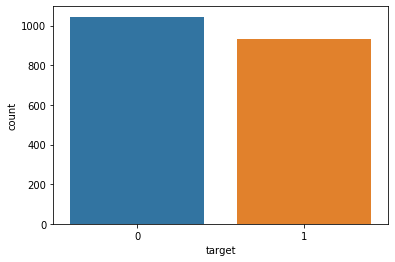

In [378]:
sns.countplot(x = "target", data=data)

### Preparing  data for a classificaiton model

In [405]:
X = data.drop(["target","Close"], axis=1).values
y = data["target"].values

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [407]:
X_train = scalar.fit_transform(X_train)

In [408]:
X_test = scalar.transform(X_test)

In [416]:
X_train.shape

(1383, 20)

In [417]:
model = Sequential()
model.add(Dense(units = 20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 1, activation ="sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [418]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=400, callbacks=[stop])

Train on 1383 samples, validate on 593 samples
Epoch 1/400
1383/1383 [==============================] - 2s 2ms/sample - loss: 0.6993 - accuracy: 0.4967 - val_loss: 0.6948 - val_accuracy: 0.4688
Epoch 2/400
1383/1383 [==============================] - 0s 222us/sample - loss: 0.6953 - accuracy: 0.5054 - val_loss: 0.6936 - val_accuracy: 0.4705
Epoch 3/400
1383/1383 [==============================] - 0s 205us/sample - loss: 0.6951 - accuracy: 0.5105 - val_loss: 0.6924 - val_accuracy: 0.5329
Epoch 4/400
1383/1383 [==============================] - 0s 206us/sample - loss: 0.6935 - accuracy: 0.5148 - val_loss: 0.6921 - val_accuracy: 0.5329
Epoch 5/400
1383/1383 [==============================] - 0s 207us/sample - loss: 0.6925 - accuracy: 0.5249 - val_loss: 0.6919 - val_accuracy: 0.5329
Epoch 6/400
1383/1383 [==============================] - 0s 205us/sample - loss: 0.6929 - accuracy: 0.5278 - val_loss: 0.6919 - val_accuracy: 0.5329
Epoch 7/400
1383/1383 [==============================] - 0s 2

1383/1383 [==============================] - 0s 202us/sample - loss: 0.6922 - accuracy: 0.5278 - val_loss: 0.6912 - val_accuracy: 0.5329
Epoch 56/400
1383/1383 [==============================] - 0s 201us/sample - loss: 0.6919 - accuracy: 0.5278 - val_loss: 0.6911 - val_accuracy: 0.5329
Epoch 57/400
1383/1383 [==============================] - 0s 200us/sample - loss: 0.6914 - accuracy: 0.5264 - val_loss: 0.6911 - val_accuracy: 0.5329
Epoch 58/400
1383/1383 [==============================] - 0s 198us/sample - loss: 0.6916 - accuracy: 0.5278 - val_loss: 0.6912 - val_accuracy: 0.5329
Epoch 59/400
1383/1383 [==============================] - 0s 201us/sample - loss: 0.6915 - accuracy: 0.5278 - val_loss: 0.6911 - val_accuracy: 0.5329
Epoch 60/400
1383/1383 [==============================] - 0s 202us/sample - loss: 0.6908 - accuracy: 0.5271 - val_loss: 0.6912 - val_accuracy: 0.5329
Epoch 61/400
1383/1383 [==============================] - 0s 203us/sample - loss: 0.6920 - accuracy: 0.5271 - val

1383/1383 [==============================] - 0s 203us/sample - loss: 0.6925 - accuracy: 0.5271 - val_loss: 0.6912 - val_accuracy: 0.5329
Epoch 110/400
1383/1383 [==============================] - 0s 201us/sample - loss: 0.6915 - accuracy: 0.5278 - val_loss: 0.6913 - val_accuracy: 0.5329
Epoch 111/400
1383/1383 [==============================] - 0s 201us/sample - loss: 0.6916 - accuracy: 0.5271 - val_loss: 0.6913 - val_accuracy: 0.5329
Epoch 112/400
1383/1383 [==============================] - 0s 200us/sample - loss: 0.6916 - accuracy: 0.5271 - val_loss: 0.6913 - val_accuracy: 0.5329
Epoch 113/400
1383/1383 [==============================] - 0s 220us/sample - loss: 0.6924 - accuracy: 0.5278 - val_loss: 0.6914 - val_accuracy: 0.5329
Epoch 114/400
1383/1383 [==============================] - 0s 200us/sample - loss: 0.6913 - accuracy: 0.5264 - val_loss: 0.6913 - val_accuracy: 0.5329
Epoch 115/400
1383/1383 [==============================] - 0s 202us/sample - loss: 0.6916 - accuracy: 0.5278

1383/1383 [==============================] - 0s 201us/sample - loss: 0.6922 - accuracy: 0.5271 - val_loss: 0.6915 - val_accuracy: 0.5329
Epoch 164/400
1383/1383 [==============================] - 0s 200us/sample - loss: 0.6914 - accuracy: 0.5271 - val_loss: 0.6915 - val_accuracy: 0.5329
Epoch 165/400
1383/1383 [==============================] - 0s 211us/sample - loss: 0.6916 - accuracy: 0.5271 - val_loss: 0.6912 - val_accuracy: 0.5329
Epoch 166/400
1383/1383 [==============================] - 0s 202us/sample - loss: 0.6909 - accuracy: 0.5271 - val_loss: 0.6910 - val_accuracy: 0.5329
Epoch 167/400
1383/1383 [==============================] - 0s 200us/sample - loss: 0.6911 - accuracy: 0.5271 - val_loss: 0.6908 - val_accuracy: 0.5329
Epoch 168/400
1383/1383 [==============================] - 0s 201us/sample - loss: 0.6911 - accuracy: 0.5271 - val_loss: 0.6906 - val_accuracy: 0.5329
Epoch 169/400
1383/1383 [==============================] - 0s 200us/sample - loss: 0.6921 - accuracy: 0.5271

1383/1383 [==============================] - 0s 202us/sample - loss: 0.6883 - accuracy: 0.5271 - val_loss: 0.6879 - val_accuracy: 0.5329
Epoch 218/400
1383/1383 [==============================] - 0s 202us/sample - loss: 0.6877 - accuracy: 0.5271 - val_loss: 0.6892 - val_accuracy: 0.5329
Epoch 219/400
1383/1383 [==============================] - 0s 198us/sample - loss: 0.6893 - accuracy: 0.5271 - val_loss: 0.6890 - val_accuracy: 0.5329
Epoch 220/400
1383/1383 [==============================] - 0s 200us/sample - loss: 0.6864 - accuracy: 0.5271 - val_loss: 0.6884 - val_accuracy: 0.5329
Epoch 221/400
1383/1383 [==============================] - 0s 198us/sample - loss: 0.6874 - accuracy: 0.5271 - val_loss: 0.6899 - val_accuracy: 0.5329
Epoch 222/400
1383/1383 [==============================] - 0s 201us/sample - loss: 0.6915 - accuracy: 0.5271 - val_loss: 0.6891 - val_accuracy: 0.5329
Epoch 223/400
1383/1383 [==============================] - 0s 201us/sample - loss: 0.6897 - accuracy: 0.5271

1383/1383 [==============================] - 0s 203us/sample - loss: 0.6817 - accuracy: 0.5293 - val_loss: 0.6805 - val_accuracy: 0.5632
Epoch 272/400
1383/1383 [==============================] - 0s 200us/sample - loss: 0.6863 - accuracy: 0.5488 - val_loss: 0.6849 - val_accuracy: 0.5548
Epoch 273/400
1383/1383 [==============================] - 0s 200us/sample - loss: 0.6861 - accuracy: 0.5560 - val_loss: 0.6866 - val_accuracy: 0.5902
Epoch 274/400
1383/1383 [==============================] - 0s 201us/sample - loss: 0.6856 - accuracy: 0.5394 - val_loss: 0.6838 - val_accuracy: 0.5346
Epoch 275/400
1383/1383 [==============================] - 0s 201us/sample - loss: 0.6859 - accuracy: 0.5481 - val_loss: 0.6871 - val_accuracy: 0.5497
Epoch 276/400
1383/1383 [==============================] - 0s 199us/sample - loss: 0.6862 - accuracy: 0.5315 - val_loss: 0.6838 - val_accuracy: 0.5329
Epoch 277/400
1383/1383 [==============================] - 0s 201us/sample - loss: 0.6768 - accuracy: 0.5611

1383/1383 [==============================] - 0s 202us/sample - loss: 0.6766 - accuracy: 0.5748 - val_loss: 0.6763 - val_accuracy: 0.5750
Epoch 326/400
1383/1383 [==============================] - 0s 200us/sample - loss: 0.6804 - accuracy: 0.5597 - val_loss: 0.6793 - val_accuracy: 0.5531
Epoch 327/400
1383/1383 [==============================] - 0s 202us/sample - loss: 0.6800 - accuracy: 0.5676 - val_loss: 0.6765 - val_accuracy: 0.5784
Epoch 328/400
1383/1383 [==============================] - 0s 216us/sample - loss: 0.6751 - accuracy: 0.5712 - val_loss: 0.6735 - val_accuracy: 0.5717
Epoch 329/400
1383/1383 [==============================] - 0s 201us/sample - loss: 0.6819 - accuracy: 0.5503 - val_loss: 0.6767 - val_accuracy: 0.5616
Epoch 330/400
1383/1383 [==============================] - 0s 202us/sample - loss: 0.6823 - accuracy: 0.5727 - val_loss: 0.6788 - val_accuracy: 0.5902
Epoch 331/400
1383/1383 [==============================] - 0s 202us/sample - loss: 0.6828 - accuracy: 0.5727

1383/1383 [==============================] - 0s 200us/sample - loss: 0.6731 - accuracy: 0.5806 - val_loss: 0.6726 - val_accuracy: 0.5717
Epoch 380/400
1383/1383 [==============================] - 0s 201us/sample - loss: 0.6800 - accuracy: 0.5662 - val_loss: 0.6709 - val_accuracy: 0.5717
Epoch 381/400
1383/1383 [==============================] - 0s 200us/sample - loss: 0.6751 - accuracy: 0.5683 - val_loss: 0.6728 - val_accuracy: 0.5852
Epoch 382/400
1383/1383 [==============================] - 0s 201us/sample - loss: 0.6798 - accuracy: 0.5604 - val_loss: 0.6735 - val_accuracy: 0.5801
Epoch 383/400
1383/1383 [==============================] - 0s 201us/sample - loss: 0.6751 - accuracy: 0.5792 - val_loss: 0.6762 - val_accuracy: 0.5616
Epoch 384/400
1383/1383 [==============================] - 0s 202us/sample - loss: 0.6784 - accuracy: 0.5625 - val_loss: 0.6740 - val_accuracy: 0.5599
Epoch 385/400
1383/1383 [==============================] - 0s 202us/sample - loss: 0.6772 - accuracy: 0.5705

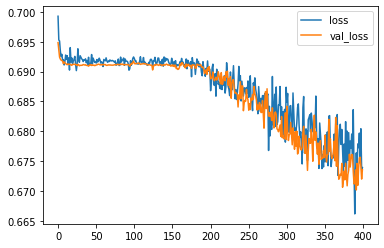

In [419]:
pd.DataFrame(model.history.history)[["loss","val_loss"]].plot()

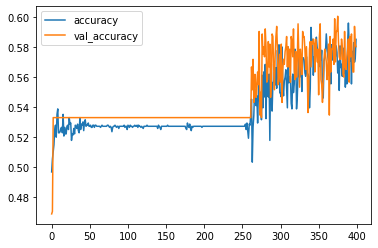

In [420]:
pd.DataFrame(model.history.history)[["accuracy","val_accuracy"]].plot()

In [421]:
predic = model.predict_classes(X_test)

In [422]:
from sklearn.metrics import classification_report, confusion_matrix

In [423]:
print(classification_report(y_test,predic))

              precision    recall  f1-score   support

           0       0.64      0.47      0.55       316
           1       0.54      0.70      0.61       277

    accuracy                           0.58       593
   macro avg       0.59      0.59      0.58       593
weighted avg       0.59      0.58      0.58       593

